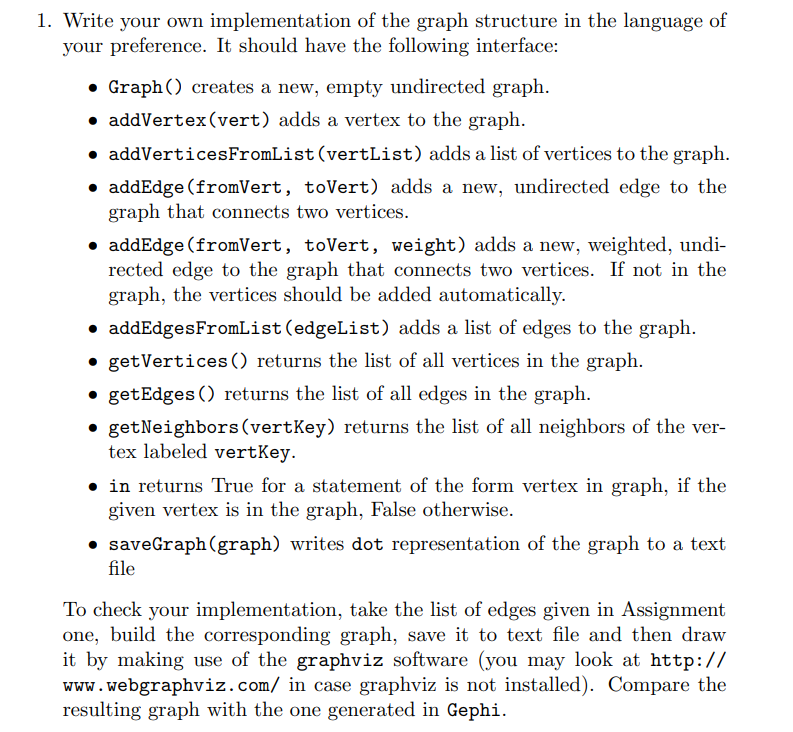

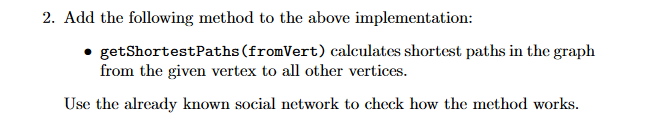

In [89]:
class graphClass():
    
    def __init__(self):
        """Creates an empty, undirected graph which contains a list of vertices and edges"""
        self.vertices = []
        self.edges = []
    
    def addVertex(self, vert):
        """Adds a new vertex to the graph with its unique key"""
        self.vertices.append({len(self.vertices):vert})
        
    def addVerticesFromList(self, vertList):
        """Adds a list of given vertices to the graph with their unique keys"""
        for v in vertList:
            self.vertices.append({len(self.vertices):v})
            
    def addEdge(self, fromVertKey, toVertKey, weight = 0):
        """Adds an edge to the graph. If a vertex does not exist, function adds it to a list of vertices"""
        keys = []
        for i in range(len(self.vertices)):
            keys.append(list(self.vertices[i].keys())[0])
        if fromVertKey not in keys:
            return "Key does not exist and can not be added."
        if toVertKey not in keys:
            return "Key does not exist and can not be added."
        edge = {(fromVertKey, toVertKey):weight}
        self.edges.append(edge)
        
    def addEdgesFromList(self, edgeList):
        """Adds a list of edges to the graph. If a vertex does not exist, function adds it to a list of vertices"""
        keys = []
        for i in range(len(self.vertices)):
            keys.append(list(self.vertices[i].keys())[0])
        for e in edgeList:
            if type(e) == tuple:
                e = {e:0}
                if list(e.keys())[0][0] not in keys:
                    return "Key does not exist and can not be added."
                if list(e.keys())[0][1] not in keys:
                    return "Key does not exist and can not be added."
                self.addEdge(list(e.keys())[0][0], list(e.keys())[0][1])
            else:
                if list(e.keys())[0][0] not in keys:
                    return "Key does not exist and can not be added."
                if list(e.keys())[0][1] not in keys:
                    return "Key does not exist and can not be added."
                self.addEdge(list(e.keys())[0][0], list(e.keys())[0][1], list(e.values())[0])
        
    def getVertices(self):
        """Returns the list of all vertices in the graph"""
        return self.vertices
    
    def getEdges(self):
        """Returns the list of all edges in the graph"""
        return self.edges
        
    def getNeighbors(self, vertKey):
        """returns the list of all neighbors of the chosen vertex"""
        neighbors = []
        for n in self.edges:
            if list(n.keys())[0][0] == vertKey:
                neighbor = list(n.keys())[0][1]
                if neighbor not in neighbors:
                    neighbors.append(list(n.keys())[0][1])
            elif list(n.keys())[0][1] == vertKey:
                neighbor = list(n.keys())[0][0]
                if neighbor not in neighbors:
                    neighbors.append(list(n.keys())[0][0])
        return neighbors
        
    def __contains__(self, vert):
        """
        returns True for a statement of the form vertex in graph, if the given vertex is in the graph, False otherwise
        """
        vals = []
        keys = []
        for i in range(len(self.vertices)):
            vals.append(list(self.vertices[i].values())[0])
            keys.append(list(self.vertices[i].keys())[0])
        if vert in vals:
            return True
        elif vert in keys:
            return True
        else:
            return False
        
    def saveGraph(self, filename):
        """writes dot representation of the graph to a text file"""
        edgesKeys = [list(i.keys())[0] for i in self.edges]
        edgesValues = [(self.vertices[i[0]], self.vertices[i[1]]) for i in edgesKeys]
        weights = [list(i.values())[0] for i in self.edges]
        with open(filename, 'w') as f:
            for i in range(len(edgesValues)):
                f.write(f"\t{str(list(edgesValues[i][0].values())[0])}{str(list(edgesValues[i][0].keys())[0])} -- {str(list(edgesValues[i][1].values())[0])}{str(list(edgesValues[i][1].keys())[0])} [label = {str(weights[i])}];\n")

    def shortestPath(self, start):
        """Calculates shortest path from chosen vertex to other vertices"""        
        if type(start) == int:            
            graph = {}
            for i in range(len(self.vertices)):
                graph[list(self.vertices[i].keys())[0]] = self.getNeighbors(i)
            vertices = [list(self.vertices[i].keys())[0] for i in range(len(self.vertices))]
            people = [list(self.vertices[i].values())[0] for i in range(len(self.vertices))]
            startName = people[start]
            allNodes = []
            for k in vertices:
                visited = []
                queue = [[start]]
                results = []
                if start == k:
                    results.append(0)
                else:
                    while queue:
                        path = queue.pop(0)
                        node = path[-1]
                        if node not in visited:
                            neighbors = graph[node]
                            for i in neighbors:
                                new_path = list(path)
                                new_path.append(i)
                                queue.append(new_path)
                                if i == vertices[k]:
                                    results.append(len(new_path)-1)
                            visited.append(node)
                allNodes.append((startName, people[k], min(results)))
            return allNodes        
        else:
            return "Please use vertex key to get shortest paths"

In [90]:
G = graphClass()

In [91]:
G.addVertex('Alice')

In [92]:
G.addVerticesFromList(
    [
        'Bob', 'Carl', 'David', 'Ernst',
        'Frank', 'Gail', 'Henry', 'Irene', 'Jen'
    ]
)

In [93]:
G.addEdge(0, 1)

In [94]:
G.addEdgesFromList(
    [
        (0, 2), {(0, 3):5}, (0, 4), (0, 5),
        (1, 6), (6, 7), {(7, 9):8}, (6, 9), (7, 8),
        (6, 8), (8, 9), (4, 5), (2, 3), (2, 5)
    ]
)

In [95]:
G.getVertices()

[{0: 'Alice'},
 {1: 'Bob'},
 {2: 'Carl'},
 {3: 'David'},
 {4: 'Ernst'},
 {5: 'Frank'},
 {6: 'Gail'},
 {7: 'Henry'},
 {8: 'Irene'},
 {9: 'Jen'}]

In [96]:
G.getEdges()

[{(0, 1): 0},
 {(0, 2): 0},
 {(0, 3): 5},
 {(0, 4): 0},
 {(0, 5): 0},
 {(1, 6): 0},
 {(6, 7): 0},
 {(7, 9): 8},
 {(6, 9): 0},
 {(7, 8): 0},
 {(6, 8): 0},
 {(8, 9): 0},
 {(4, 5): 0},
 {(2, 3): 0},
 {(2, 5): 0}]

In [102]:
G.getNeighbors(0)

[1, 2, 3, 4, 5]

In [98]:
10 in G

False

In [99]:
1 in G

True

In [100]:
G.saveGraph("graph1.txt")

In [101]:
G.shortestPath(0)

[('Alice', 'Alice', 0),
 ('Alice', 'Bob', 1),
 ('Alice', 'Carl', 1),
 ('Alice', 'David', 1),
 ('Alice', 'Ernst', 1),
 ('Alice', 'Frank', 1),
 ('Alice', 'Gail', 2),
 ('Alice', 'Henry', 3),
 ('Alice', 'Irene', 3),
 ('Alice', 'Jen', 3)]

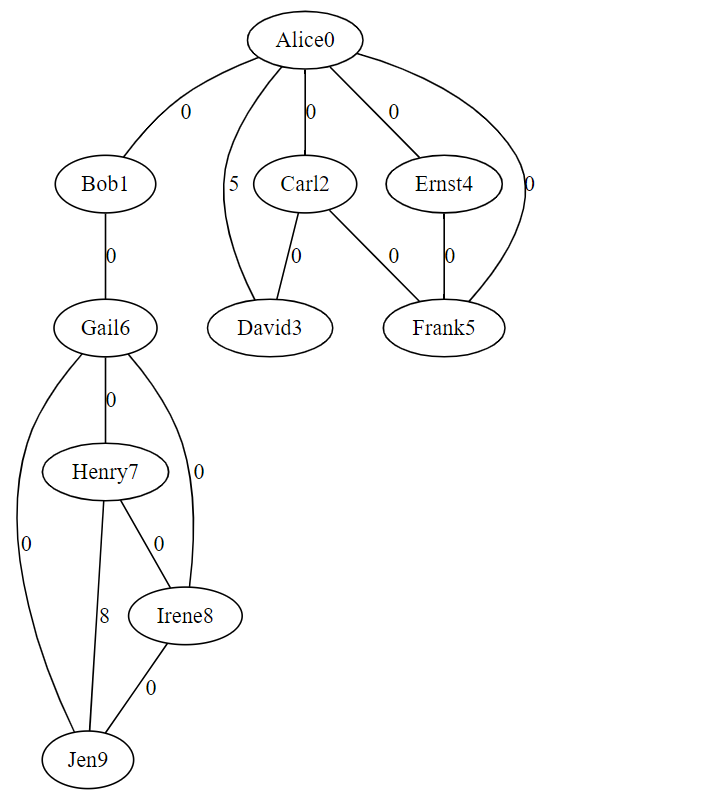